# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

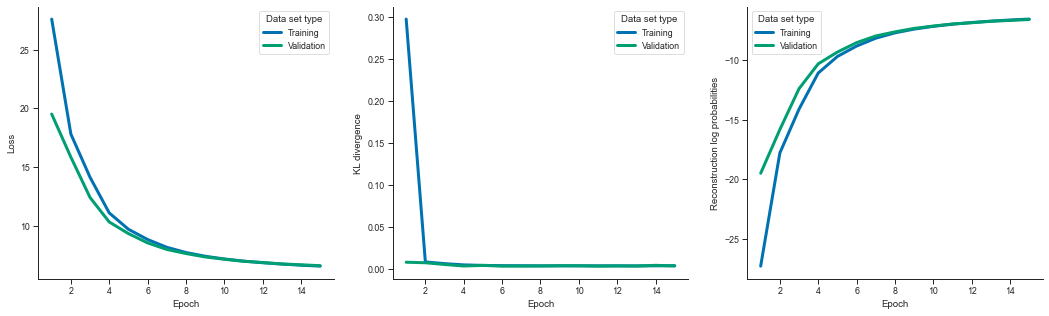

In [2]:
# Use the SummaryModels class
file_name = "RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

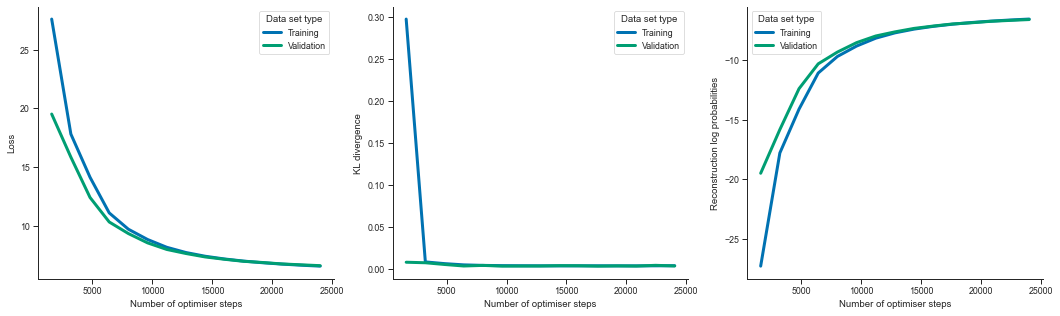

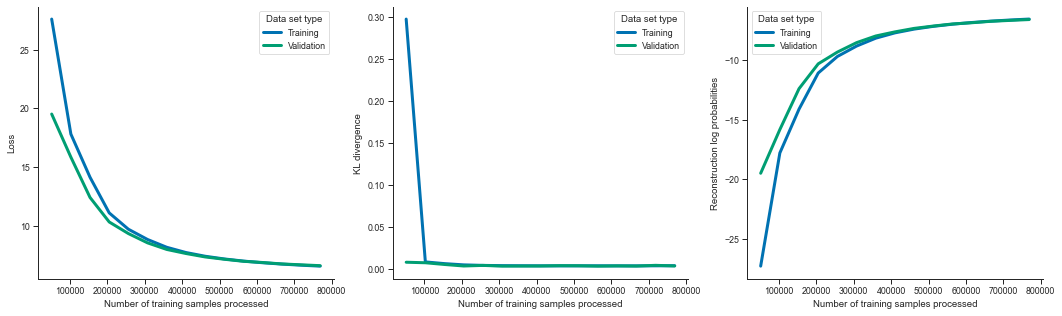

In [3]:
# Plot the same things as above, but with optimizer steps and number of processed training samples on the x-axis
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Step"), x="Number of optimiser steps")
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Sample"), x="Number of training samples processed")

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

In [ ]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"
hue = "Ship type"
hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

In [ ]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-15, 0], print_summary_stats=True)

In [ ]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()